### Data Preparation
(read + add technical indicators + convert close prise to log returns)

In [11]:
import ta
import pandas as pd
import numpy as np

In [12]:
%%capture

data = pd.read_csv('data/stocks_s&p500/ESRX_data.csv').rename(columns={"date": "Date", "open": "Open", "high": "High",
                                                                    "low": "Low", "close": "Close", "volume": "Volume"}).drop(['Name'], axis=1)
data['LogRet'] = np.log(data['Close']).diff()
data = ta.add_all_ta_features(
    data, open="Open", high="High", low="Low", close="LogRet", volume="Volume")
data_array = data[['LogRet', 'volume_adi', 'trend_macd', 'volatility_kcp', 'momentum_stoch_rsi', 'trend_sma_slow']].dropna().to_numpy()

print prices plot

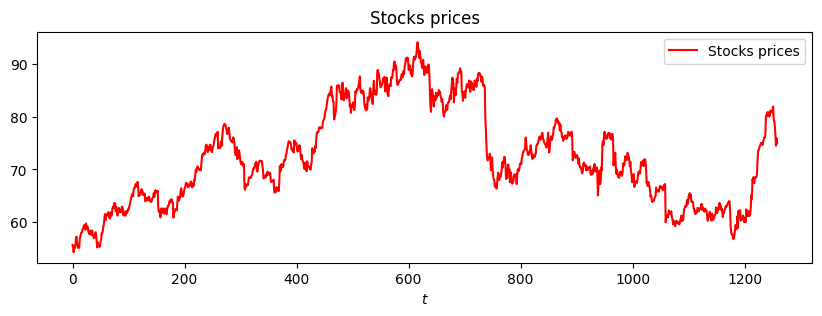

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Stocks prices")
plt.xlabel("$t$")

plt.plot(data['Close'], label="Stocks prices", color="red")
plt.legend()
plt.show()

print log returns plot

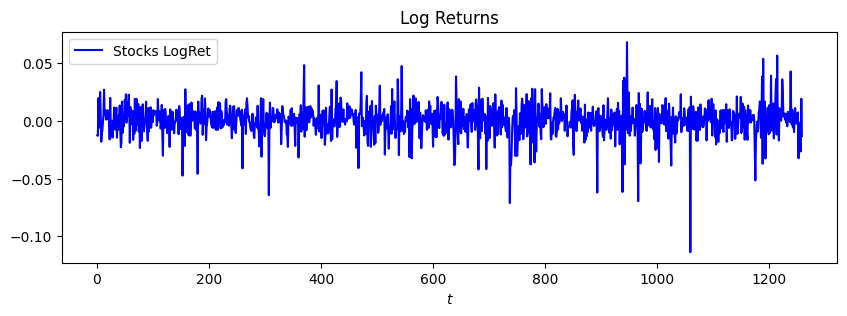

In [14]:
plt.figure(figsize=(10, 3))
plt.title("Log Returns")
plt.xlabel("$t$")

plt.plot(data['LogRet'], label="Stocks LogRet", color="blue")
plt.legend()
plt.show()

In [15]:
import statsmodels.api as sm

logrets = data['LogRet'].dropna().to_numpy()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(logrets)[1])

Dickey-Fuller test: p=0.000000


### Reservoir model

При инициализации объекта класса ESNPredictions можно выбрать: размер окна, используемого для генерации предсказаний(window_size), количество шагов предсказания(forecast_size), размер тестовой выборки(test_size) \
При вызове функции get_predictions можно указать параметр отвечающий за оптимизацию гиперпараметров модели(opt)

In [16]:
%%capture

from models.esn import ESNPredictions

esn_preds_simple = ESNPredictions(data_array, window_size=50, forecast_size=10, test_size=0.1, model_type='simple')
Y_pred_simple = esn_preds_simple .get_predictions(opt=True)
Y_test_simple = esn_preds_simple .Y_test[:, 0][:len(Y_pred_simple)]

In [34]:
%%capture

esn_preds_deep = ESNPredictions(data_array, window_size=50, forecast_size=10, test_size=0.1, model_type='deep')
Y_pred_deep = esn_preds_deep.get_predictions(opt=True)
Y_test_deep = esn_preds_deep.Y_test[:, 0][:len(Y_pred_deep)]

In [35]:
Y_pred_deep

array([ 8.53733730e-04,  8.62248153e-04,  8.70685979e-04,  8.79047447e-04,
        8.87332797e-04,  8.95542268e-04,  9.03676102e-04,  9.11734542e-04,
        9.19717832e-04,  9.27626216e-04,  8.25606013e-04,  8.34645010e-04,
        8.43605852e-04,  8.52488768e-04,  8.61293988e-04,  8.70021744e-04,
        8.78672268e-04,  8.87245795e-04,  8.95742560e-04,  9.04162799e-04,
        8.82873658e-04,  8.91441583e-04,  8.99932564e-04,  9.08346835e-04,
        9.16684636e-04,  9.24946206e-04,  9.33131784e-04,  9.41241614e-04,
        9.49275938e-04,  9.57234999e-04,  7.76982036e-04,  7.86116521e-04,
        7.95172745e-04,  8.04150935e-04,  8.13051319e-04,  8.21874127e-04,
        8.30619590e-04,  8.39287941e-04,  8.47879413e-04,  8.56394240e-04,
        7.28617426e-04,  7.38442349e-04,  7.48187145e-04,  7.57852027e-04,
        7.67437212e-04,  7.76942915e-04,  7.86369355e-04,  7.95716751e-04,
        8.04985324e-04,  8.14175297e-04,  9.94812856e-04,  1.00304725e-03,
        1.01120527e-03,  

In [32]:
%%capture

esn_preds_hier = ESNPredictions(data_array, window_size=50, forecast_size=10, test_size=0.1, model_type='hierarchical')
Y_pred_hier = esn_preds_hier.get_predictions(opt=True)
Y_test_hier = esn_preds_hier.Y_test[:, 0][:len(Y_pred_hier)]

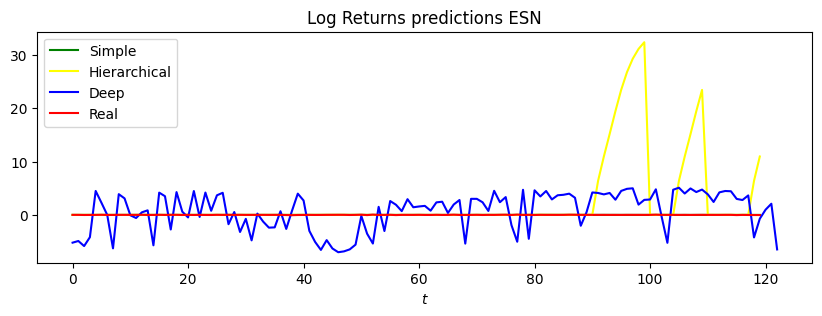

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Log Returns predictions ESN")
plt.xlabel("$t$")
plt.plot(Y_pred_simple, label="Simple", color="green")
plt.plot(Y_pred_hier, label="Hierarchical", color="yellow")
plt.plot(Y_pred_deep, label="Deep", color="blue")
plt.plot(Y_test_simple, label="Real", color="red")
plt.legend()
plt.show()

In [10]:
from sklearn import metrics

mae_simple = metrics.mean_absolute_error(Y_test_simple, Y_pred_simple[:len(Y_test_simple)])
mae_deep = metrics.mean_absolute_error(Y_test_deep, Y_pred_deep[:len(Y_test_deep)])
mae_hier = metrics.mean_absolute_error(Y_test_hier, Y_pred_hier[:len(Y_test_hier)])
print('MAE для simple ESN модели:', mae_simple)
print('MAE для deep ESN модели:', mae_deep)
print('MAE для hier ESN модели:', mae_hier)

MAE для simple ESN модели: 0.007384837873507958
MAE для deep ESN модели: 0.008141649133196831
MAE для hier ESN модели: 0.007418930242580332


### Arima
При инициализации объекта класса Arimaredictions можно выбрать: количество шагов предсказания(forecast_size), размер тестовой выборки(test_size) \
При вызове функции get_predictions можно указать параметр отвечающий за оптимизацию гиперпараметров модели(opt)

In [86]:
%%capture
from models.arima import ArimaPredictions

arima = ArimaPredictions(data_array, forecast_size=10, test_size=0.1)
Y_pred_arima = arima.get_predictions(opt=False)
Y_test_arima = arima.Y_test[:len(Y_pred_arima)]

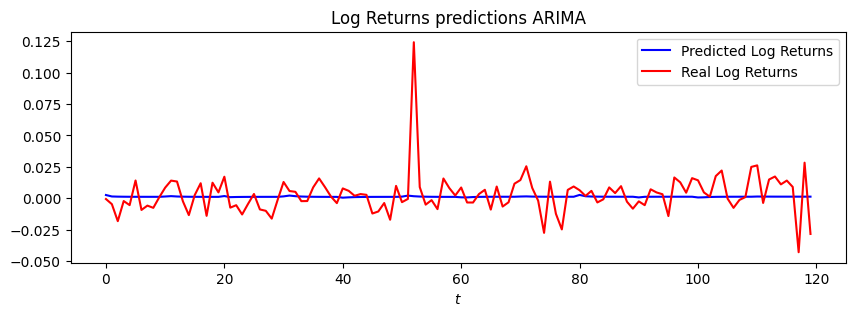

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Log Returns predictions ARIMA")
plt.xlabel("$t$")
#plt.plot(Y_train, label="Predicted stocks", color="red")
plt.plot(Y_pred_arima, label="Predicted Log Returns", color="blue")
plt.plot(Y_test_arima, label="Real Log Returns", color="red")
plt.legend()
plt.show()

In [88]:
mae = metrics.mean_absolute_error(Y_test_arima, Y_pred_arima)
print('MAE для Arima модели:', mae)

MAE для Arima модели: 0.00994841577487988


### LSTM

In [89]:
%%capture
from models.lstm import LSTMPredictions

lstm = LSTMPredictions(data_array, window_size=50, forecast_size=10, test_size=0.1)
Y_pred_lstm = lstm.get_predictions(opt=False)
Y_test_lstm = lstm.Y_test_one_dim[:len(Y_pred_lstm)]

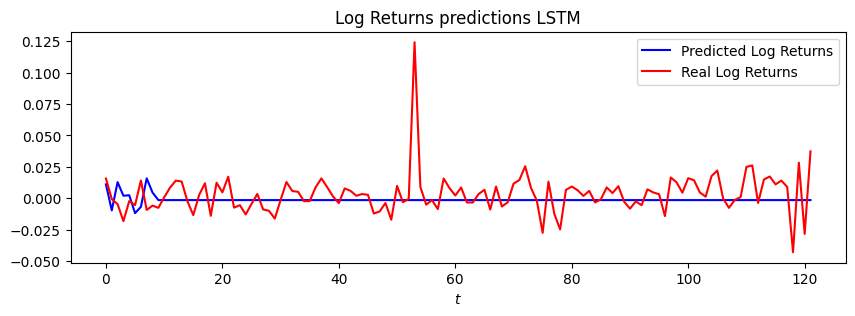

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Log Returns predictions LSTM")
plt.xlabel("$t$")
#plt.plot(Y_train, label="Predicted stocks", color="red")
plt.plot(Y_pred_lstm, label="Predicted Log Returns", color="blue")
plt.plot(Y_test_lstm, label="Real Log Returns", color="red")
plt.legend()
plt.show()

In [91]:
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test_lstm, Y_pred_lstm)
print('MAE для LSTM модели:', mae)

MAE для LSTM модели: 0.011014350890249573


### GRU

In [92]:
%%capture
from models.gru import GRUPredictions

gru = GRUPredictions(data_array, window_size=100, forecast_size=3, test_size=0.1)
Y_pred_gru = gru.get_predictions(opt=False)
Y_test_gru = gru.Y_test_one_dim[:len(Y_pred_gru)]

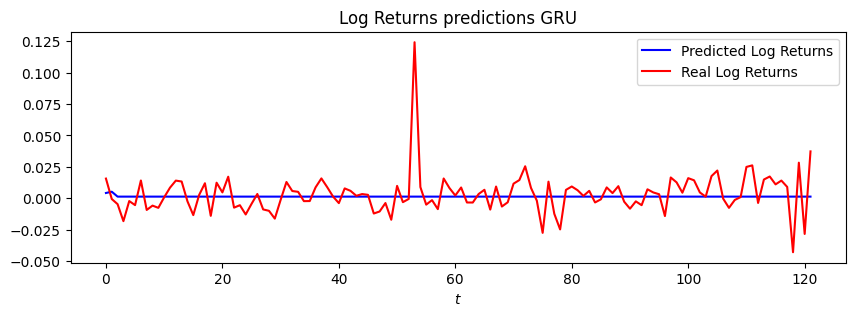

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Log Returns predictions GRU")
plt.xlabel("$t$")

plt.plot(Y_pred_gru, label="Predicted Log Returns", color="blue")
plt.plot(Y_test_gru, label="Real Log Returns", color="red")
plt.legend()
plt.show()

In [94]:
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test_gru, Y_pred_gru)
print('MAE для GRU модели:', mae)

MAE для GRU модели: 0.010215719757291965


### Stocks

In [95]:
Y_real = data['Close'][-len(Y_pred_simple):].values
Y_price_simple=np.multiply(Y_real, np.exp(Y_pred_simple))
Y_price_deep=np.multiply(Y_real, np.exp(Y_pred_deep))
Y_price_hier=np.multiply(Y_real, np.exp(Y_pred_hier))
Y_price_lstm=np.multiply(Y_real, np.exp(Y_pred_lstm)[:len(Y_real)])
Y_price_gru=np.multiply(Y_real, np.exp(Y_pred_gru)[:len(Y_real)])
Y_price_arima=np.multiply(Y_real, np.exp(Y_pred_arima)[:len(Y_real)])

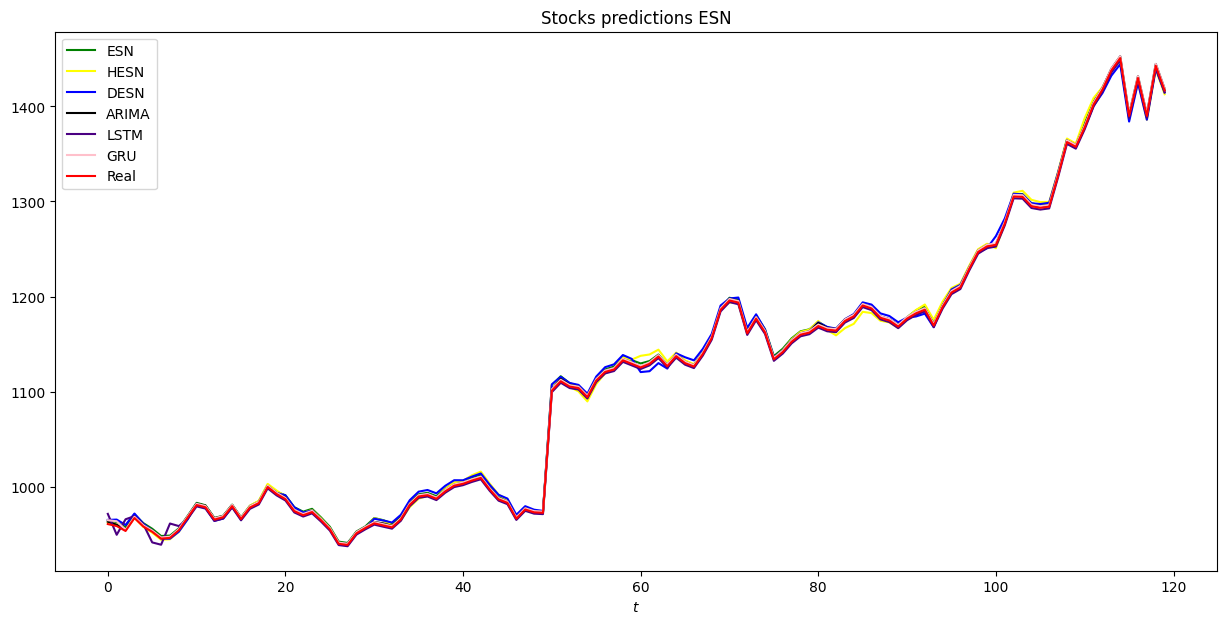

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.title("Stocks predictions ESN")
plt.xlabel("$t$")
plt.plot(Y_price_simple, label="ESN", color="green")
plt.plot(Y_price_hier, label="HESN", color="yellow")
plt.plot(Y_price_deep, label="DESN", color="blue")
plt.plot(Y_price_arima, label="ARIMA", color="black")
plt.plot(Y_price_lstm, label="LSTM", color="indigo")
plt.plot(Y_price_gru, label="GRU", color="pink")
plt.plot(Y_real, label="Real", color="red")
plt.legend()
plt.show()

In [97]:
mae_simple = metrics.mean_absolute_error(Y_real, Y_price_simple)
mae_deep = metrics.mean_absolute_error(Y_real, Y_price_deep)
mae_hier = metrics.mean_absolute_error(Y_real, Y_price_hier)
mae_arima = metrics.mean_absolute_error(Y_real, Y_price_arima)
mae_lstm = metrics.mean_absolute_error(Y_real, Y_price_lstm)
mae_gru = metrics.mean_absolute_error(Y_real, Y_price_gru)
print('MAE для simple ESN модели:', mae_simple)
print('MAE для deep ESN модели:', mae_deep)
print('MAE для hier ESN модели:', mae_hier)
print('MAE для arima модели:', mae_arima)
print('MAE для lstm модели:', mae_lstm)
print('MAE для gru модели:', mae_gru)

MAE для simple ESN модели: 2.4957754138762285
MAE для deep ESN модели: 3.3540406875502877
MAE для hier ESN модели: 3.1052566255821876
MAE для arima модели: 1.4101083881408585
MAE для lstm модели: 2.1002720032682163
MAE для gru модели: 1.5514488516748068


### Second try to convert logreturns to prices

In [98]:
def convert_to_price(Y_real, Y_pred, forecast_size = 10):
    Y_real = Y_real[::forecast_size]
    #print(Y_real)
    Y_pred_cut = [Y_pred[j:j+forecast_size] for j in range(0, len(Y_pred), forecast_size)]
    #print(Y_pred_cut)
    Y_price_pred = []
    for i in range(len(Y_real)):
        predicted = (np.exp(np.cumsum(Y_pred_cut[i]))) * Y_real[i]
        #print(predicted)
        Y_price_pred.extend(predicted)
    return Y_price_pred

In [99]:
Y_price_simple=convert_to_price(Y_real, Y_pred_simple)
Y_price_deep=convert_to_price(Y_real, Y_pred_deep)
Y_price_hier=convert_to_price(Y_real, Y_pred_hier)
Y_price_lstm=convert_to_price(Y_real, Y_pred_lstm[:len(Y_real)])
Y_price_gru=convert_to_price(Y_real, Y_pred_gru[:len(Y_real)])
Y_price_arima=convert_to_price(Y_real, Y_pred_arima[:len(Y_real)])

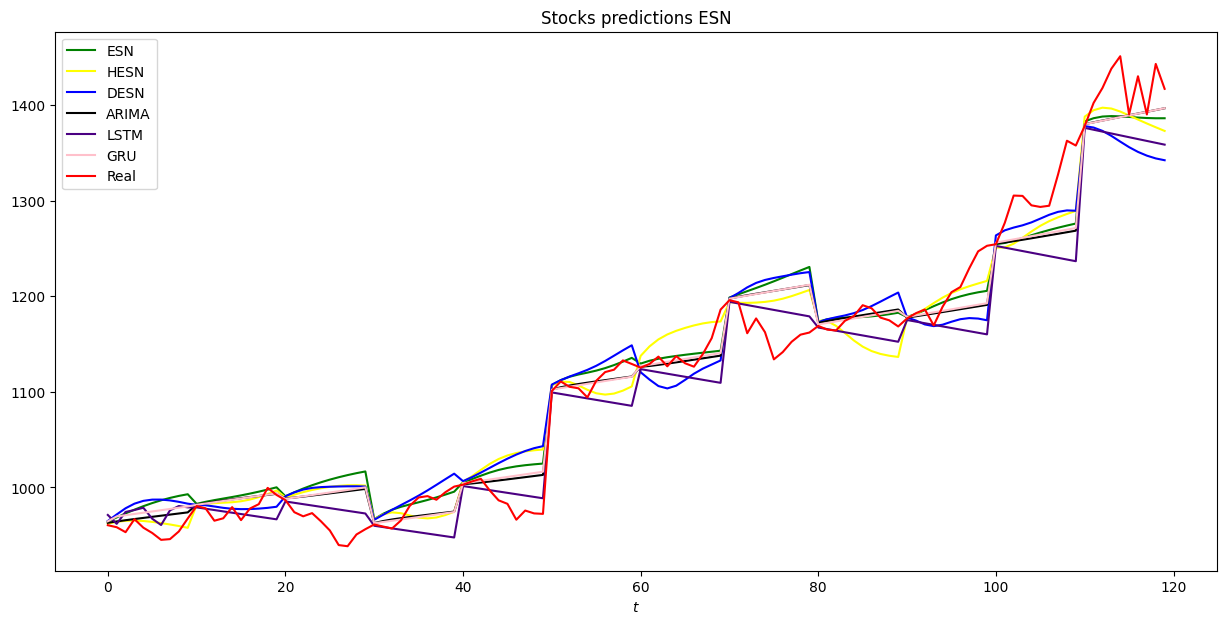

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.title("Stocks predictions ESN")
plt.xlabel("$t$")
plt.plot(Y_price_simple, label="ESN", color="green")
plt.plot(Y_price_hier, label="HESN", color="yellow")
plt.plot(Y_price_deep, label="DESN", color="blue")
plt.plot(Y_price_arima, label="ARIMA", color="black")
plt.plot(Y_price_lstm, label="LSTM", color="indigo")
plt.plot(Y_price_gru, label="GRU", color="pink")
plt.plot(Y_real, label="Real", color="red")
plt.legend()
plt.show()

In [101]:
mae_simple = metrics.mean_absolute_error(Y_real, Y_price_simple)
mae_deep = metrics.mean_absolute_error(Y_real, Y_price_deep)
mae_hier = metrics.mean_absolute_error(Y_real, Y_price_hier)
mae_arima = metrics.mean_absolute_error(Y_real, Y_price_arima)
mae_lstm = metrics.mean_absolute_error(Y_real, Y_price_lstm)
mae_gru = metrics.mean_absolute_error(Y_real, Y_price_gru)
print('MAE для simple ESN модели:', mae_simple)
print('MAE для deep ESN модели:', mae_deep)
print('MAE для hier ESN модели:', mae_hier)
print('MAE для arima модели:', mae_arima)
print('MAE для lstm модели:', mae_lstm)
print('MAE для gru модели:', mae_gru)

MAE для simple ESN модели: 23.68373138054259
MAE для deep ESN модели: 28.172006320174756
MAE для hier ESN модели: 24.230667424703384
MAE для arima модели: 21.197606671243406
MAE для lstm модели: 26.04108463541667
MAE для gru модели: 21.49024664306641
